In [2]:
from utils import *


In [3]:
set([i for i in dir(cv) if 'MORPH' in i])

{'MORPH_BLACKHAT',
 'MORPH_CLOSE',
 'MORPH_CROSS',
 'MORPH_DILATE',
 'MORPH_ELLIPSE',
 'MORPH_ERODE',
 'MORPH_GRADIENT',
 'MORPH_HITMISS',
 'MORPH_OPEN',
 'MORPH_RECT',
 'MORPH_TOPHAT'}

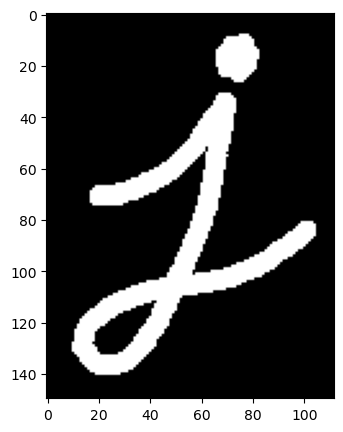

In [4]:
img = readImage('./input/j.png')
showImage(img)

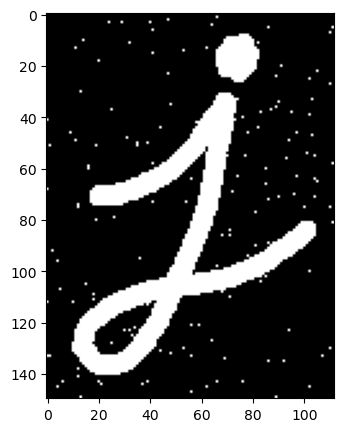

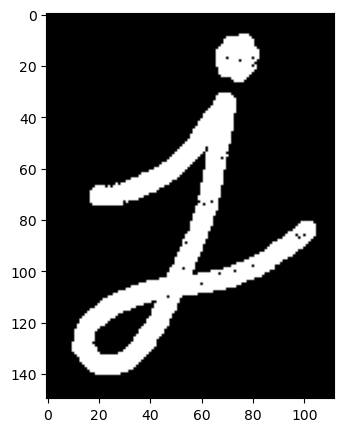

In [5]:
points_num = img.shape[0] * img.shape[1] // 100
img_noise_w = img.copy()
img_noise_b = img.copy()
for y, x in zip(np.random.randint(0, img.shape[0], points_num), np.random.randint(0, img.shape[1], points_num)):
    img_noise_w[y][x] = np.array([255, 255, 255], np.uint8)
    img_noise_b[y][x] = np.array([0, 0, 0], np.uint8)
showImage(img_noise_w)
showImage(img_noise_b)


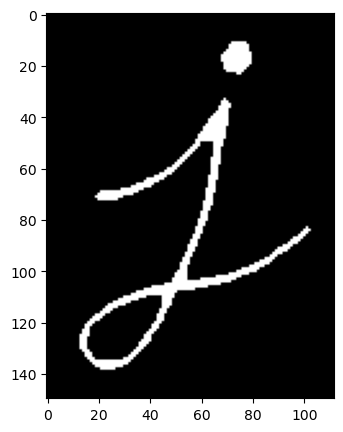

In [6]:
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.uint8)
dest = cv.erode(img_noise_w, kernel, iterations=1)
showImage(dest)

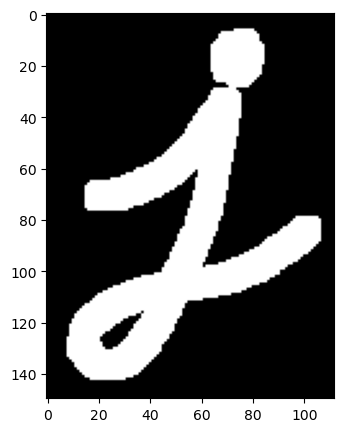

In [7]:
dest = cv.dilate(img_noise_b, kernel)
showImage(dest)

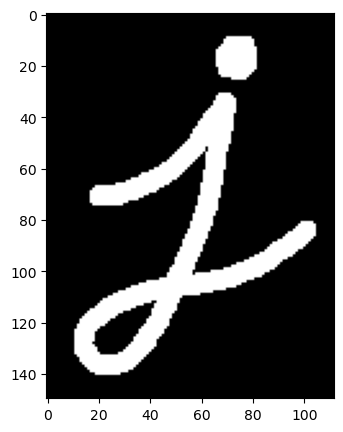

In [8]:
dest = cv.morphologyEx(img_noise_w, cv.MORPH_OPEN, kernel)
showImage(dest)

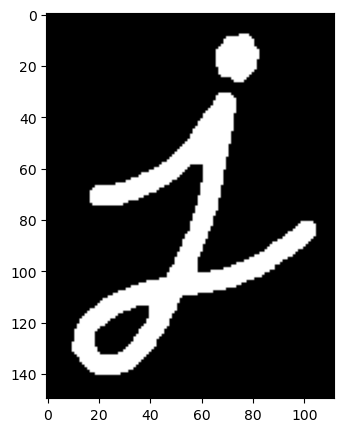

In [9]:
dest = cv.morphologyEx(img_noise_b, cv.MORPH_CLOSE, kernel)
showImage(dest)

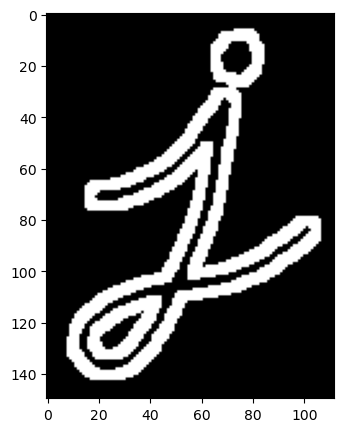

In [10]:
dest = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
showImage(dest)

In [11]:
img_e = cv.morphologyEx(img, cv.MORPH_ERODE, kernel)
img_d = cv.morphologyEx(img, cv.MORPH_DILATE, kernel)

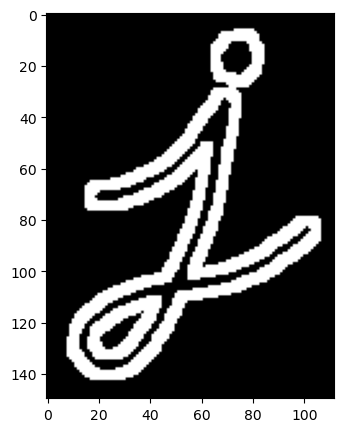

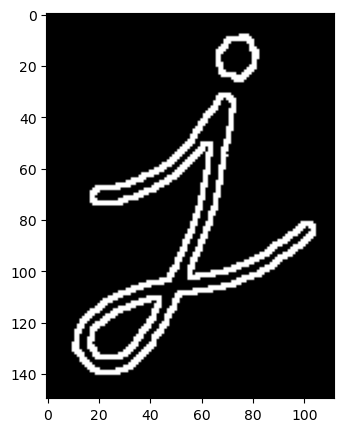

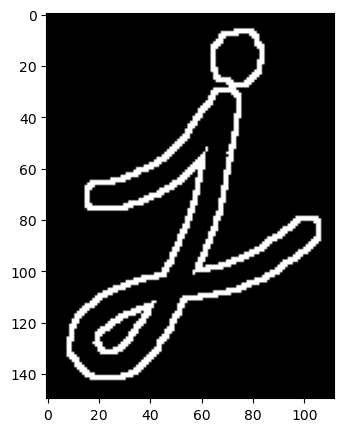

In [12]:
showImage(img_d - img_e)
showImage(img - img_e)
showImage(img_d - img)


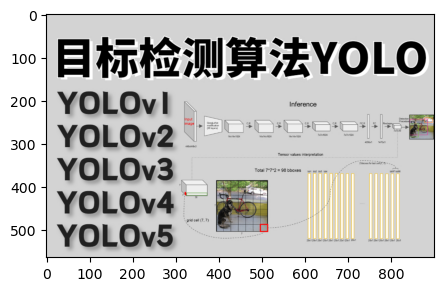

In [13]:
img = readImage('./input/test.png')
showImage(img)

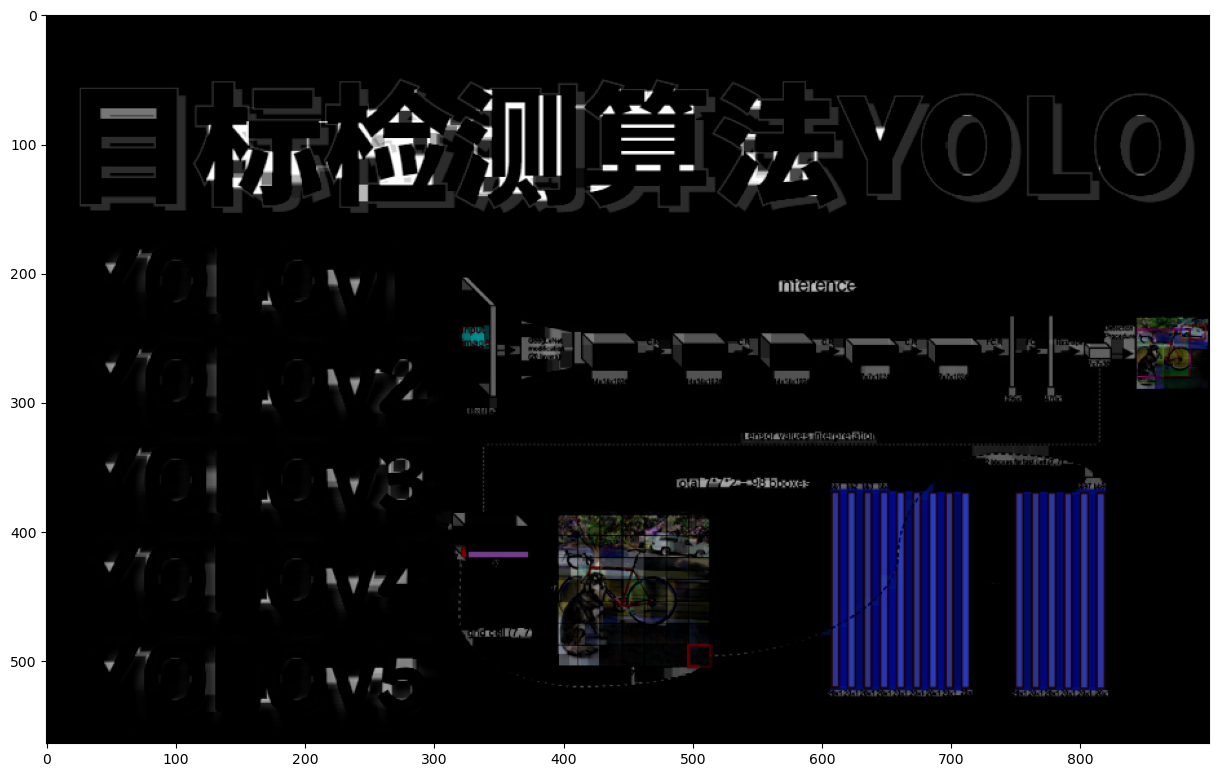

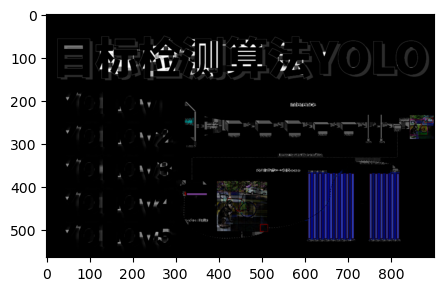

In [16]:
kernel_size = 9
kernel = np.ones((kernel_size, kernel_size), np.uint8)
dest = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
showImage(dest, figsize=(15, 15))
showImage(img - cv.morphologyEx(img, cv.MORPH_OPEN, kernel))

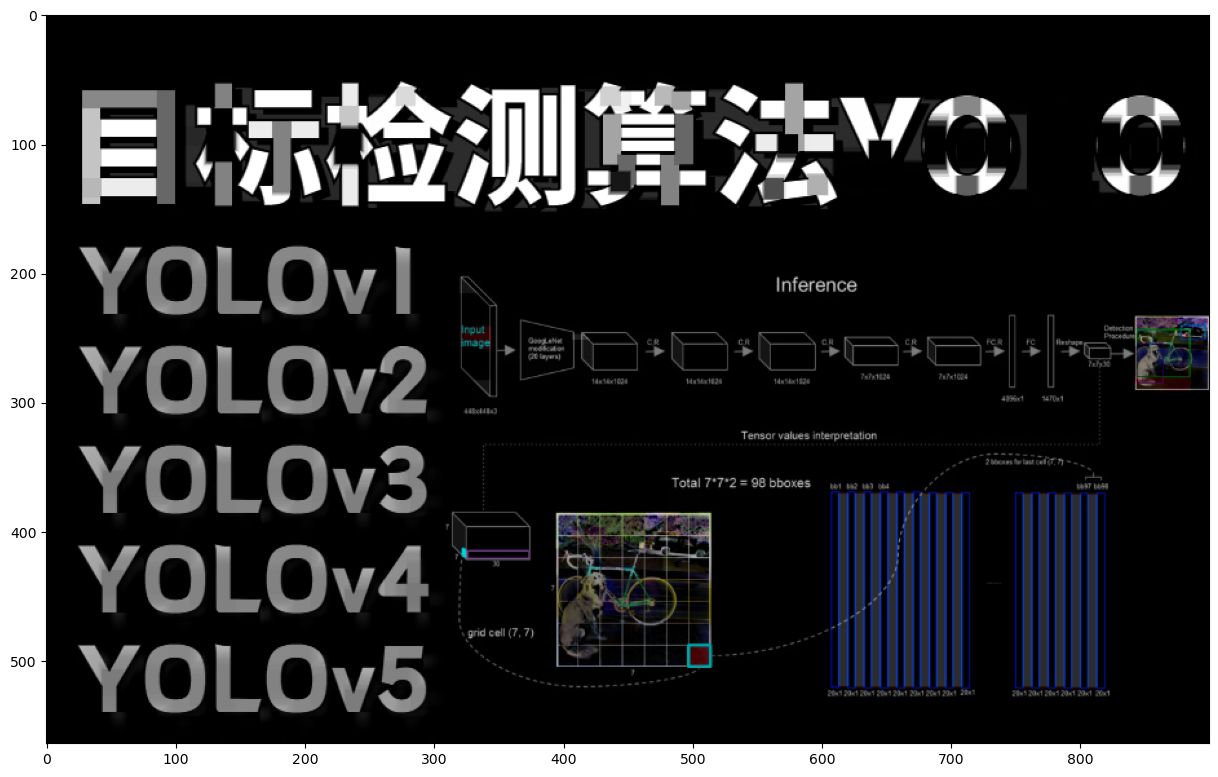

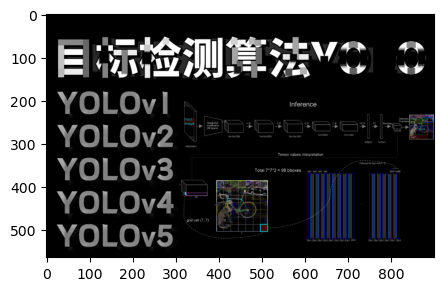

In [17]:
kernel_size = 15
kernel = np.ones((kernel_size, kernel_size), np.uint8)
dest = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
showImage(dest, figsize=(15, 15))
showImage(cv.morphologyEx(img, cv.MORPH_CLOSE, kernel) - img) 